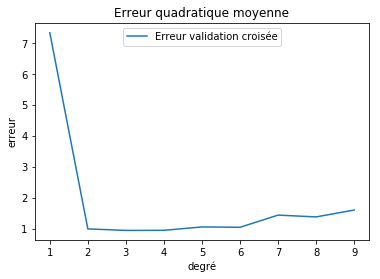

In [22]:
# Régression polynomiale avec sklearn pour des données quadratiques simulées 
# Transformation des données avec PolynomialFeatures
# Validation croisée
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

def h_quadratique_univarie(theta,x):
    return theta[0]+theta[1]*x+theta[2]*x**2

# Génération de données avec résidus ~ N(0,1)
m=30 # nombre de lignes de données
theta_simule = (1,1,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*10-5 # m valeurs de x entre -5 et 5
Y = h_quadratique_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)

liste_erreurs = []
max_degre = 10

for degre_polynome in range(1,max_degre):

    # Transformation par PolynomialFeatures
    transformateur_poly = PolynomialFeatures(degree=degre_polynome, include_bias=False)
    X_poly = transformateur_poly.fit_transform(X[:,np.newaxis])

    # Régression avec LinearRegression
    modele = LinearRegression(fit_intercept=True)
    modele.fit(X_poly,Y)
    
    scores = cross_val_score(modele,X_poly,Y,scoring="neg_mean_squared_error",cv=10)
    eqms = np.sqrt(-scores)
    eqm_moyenne = eqms.mean()
    liste_erreurs.append(eqm_moyenne)

liste_degre = np.arange(1,max_degre)
plt.plot(liste_degre,liste_erreurs,label='Erreur validation croisée')
plt.title("Erreur quadratique moyenne")
plt.xlabel('degré')
plt.ylabel('erreur')
plt.legend(loc='upper center')
plt.show()